# 📋 Jupyter Notebook Quick Shortcuts (Markdown cell)
# Press 'H' in command mode to view all shortcuts
# 
# **Command Mode** (press Esc to enter):
# - A: Insert cell above
# - B: Insert cell below
# - D D: Delete current cell
# - Z: Undo delete
# - M: Change cell to Markdown
# - Y: Change cell to Code
# - Shift + Enter: Run cell and go to next
# - Ctrl + Enter: Run cell (stay on it)
#
# **Edit Mode** (press Enter to enter):
# - Tab: Auto-complete
# - Shift + Tab: Show function hint
# - Ctrl + /: Comment/uncomment line


# **1. Prepare libraries**

In [63]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install graphviz
!pip install jupyter
!pip install openpyxl
!pip install pydot pydotplus


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=c950cabf515398f900b064dadccece1fc08b33d56f6e9cd15aa1e8f613572184
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **2. Prepare datasets**

## **2.1. Get data from file**

In [65]:
import pandas as pd

column_names = [
    "species",          # Target: Adelie: 0 / Gentoo: 1 / Chinstrap: 2
    "island",           # Torgersen / Biscoe / Dream
    "bill length",      # Real number
    "bill depth",       # Real number
    "flipper length",   # Integer
    "body mass",        # Integer
    "sex",              # Male / Female
    "year"              # Integer - year
]

data_frame = pd.read_csv("Data\palmerpenguins\penguins.csv", skiprows=1, names=column_names, na_values="NA")
# data_frame["species"] = data_frame["species"].map({"Adelie": 0, "Gentoo": 1, "Chinstrap": 2})

# Fill NA
for i in range (2, 6):
    data_frame[column_names[i]] = data_frame[column_names[i]].fillna(data_frame[column_names[i]].median())
data_frame["sex"] = data_frame["sex"].fillna(data_frame["sex"].mode()[0])

# One-hot encoding
data_frame = pd.get_dummies(data_frame, columns=['island', 'sex'], prefix=['island', 'sex'])


print(data_frame)


       species  bill length  bill depth  flipper length  body mass  year  \
0       Adelie        39.10        18.7           181.0     3750.0  2007   
1       Adelie        39.50        17.4           186.0     3800.0  2007   
2       Adelie        40.30        18.0           195.0     3250.0  2007   
3       Adelie        44.45        17.3           197.0     4050.0  2007   
4       Adelie        36.70        19.3           193.0     3450.0  2007   
..         ...          ...         ...             ...        ...   ...   
339  Chinstrap        55.80        19.8           207.0     4000.0  2009   
340  Chinstrap        43.50        18.1           202.0     3400.0  2009   
341  Chinstrap        49.60        18.2           193.0     3775.0  2009   
342  Chinstrap        50.80        19.0           210.0     4100.0  2009   
343  Chinstrap        50.20        18.7           198.0     3775.0  2009   

     island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male  
0           

## **2.2. Split the dataset**

In [66]:
X = data_frame.drop("species", axis=1)
# bảng mỗi cột target
y = data_frame["species"]

from sklearn.model_selection import train_test_split

proportions = [0.4, 0.6, 0.8, 0.9]

subsets = {}

for ratio in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size = ratio,
        test_size = 1-ratio,
        stratify = y,
        random_state = 42,
        shuffle=True
    )
    
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}" 
    # cộng với 0.001 để tránh làm tròn xuống =))
    subsets[f"feature_train_{key}"] = X_train
    subsets[f"label_train_{key}"] = y_train
    subsets[f"feature_test_{key}"] = X_test
    subsets[f"label_test_{key}"] = y_test
    
print("Length of subsets is 16: ", len(subsets) == 16)



Length of subsets is 16:  True


## **2.3. Visualize the dataset**

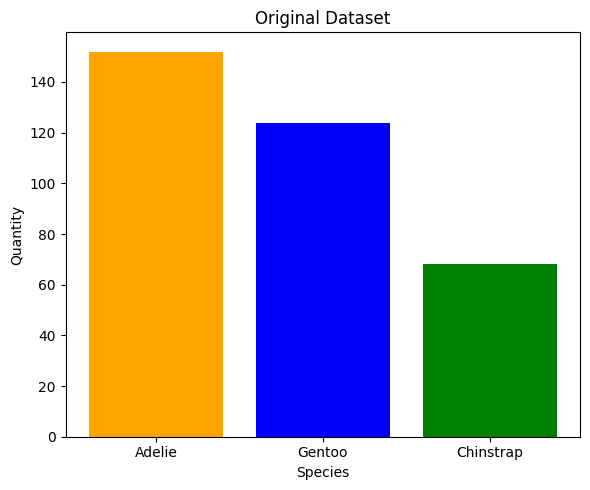

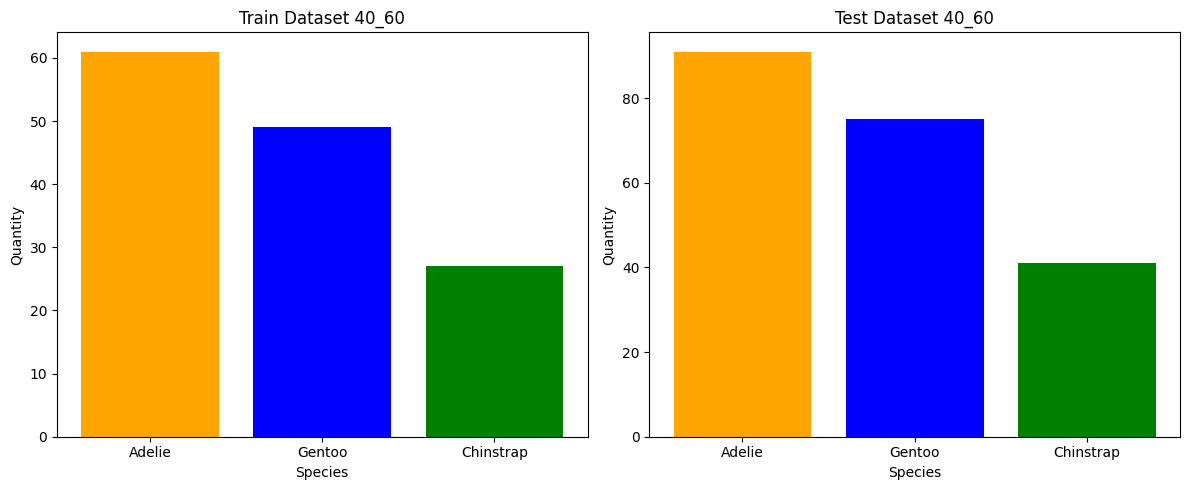

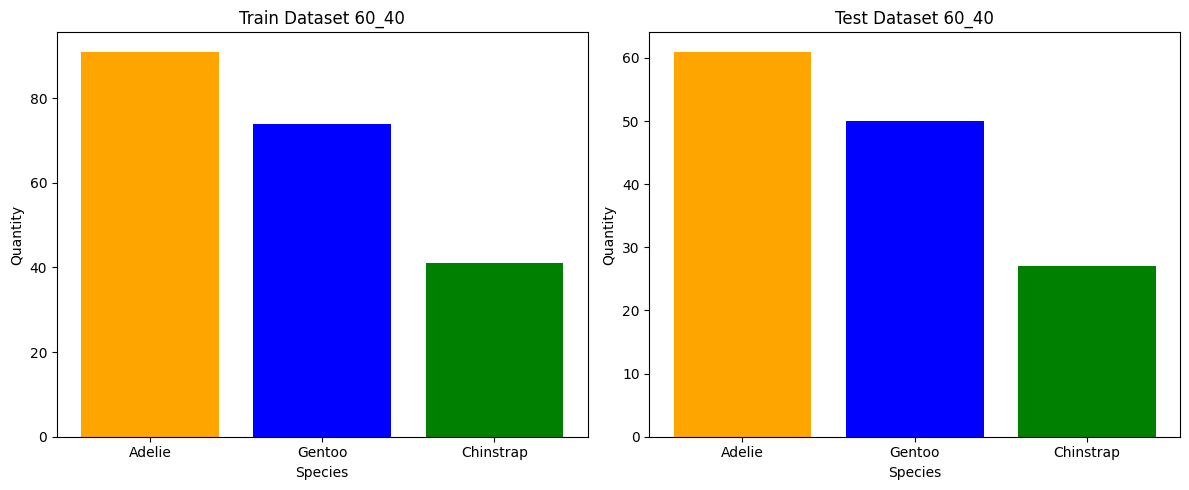

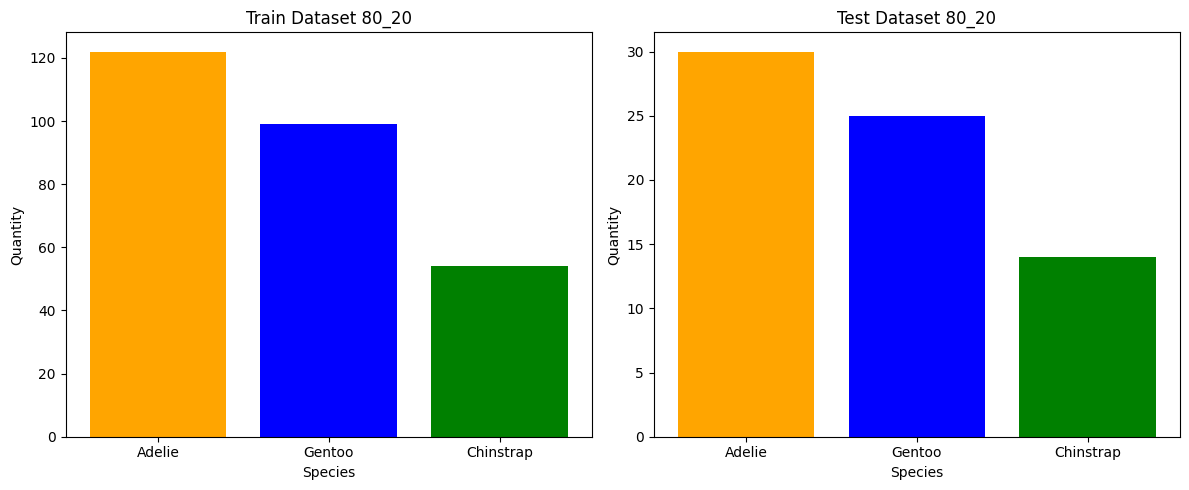

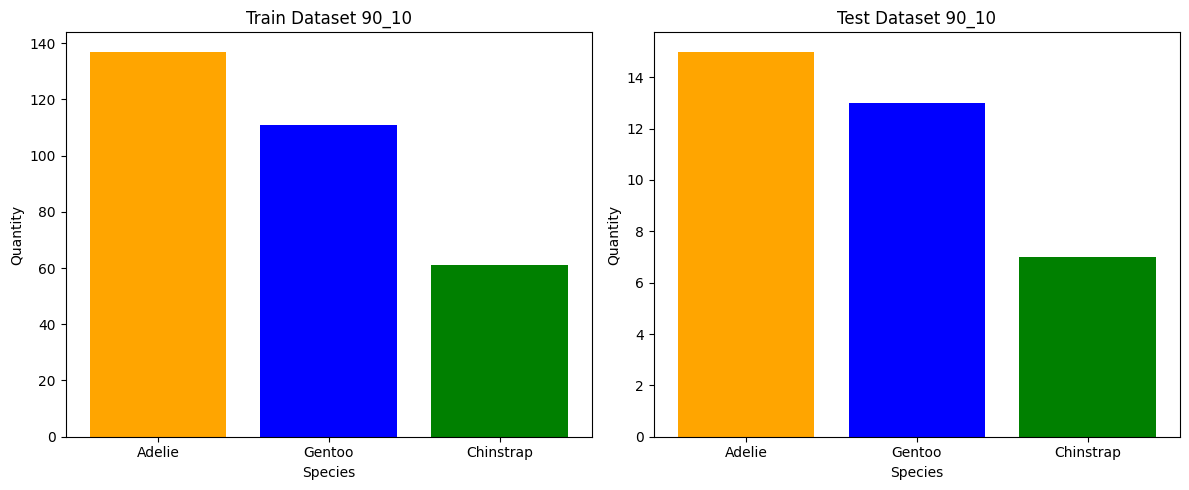

In [67]:
import matplotlib.pyplot as plt

def plot_distribution(y_train, y_test, title_train, title_test):
    # Define colors and class order
    class_order = ['Adelie', 'Gentoo', 'Chinstrap']
    colors = ['orange', 'blue', 'green']  # Adelie=orange, Gentoo=blue, Chinstrap=green
    
    if y_train.equals(y_test):
        # Plot one graph for identical datasets (original dataset)
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        
        counts = y_train.value_counts()
        labels = counts.index
        values = counts.values
        
        ax.bar(labels, values, color=colors)
        ax.set_title(f"{title_train}")
        ax.set_xlabel("Species")
        ax.set_ylabel("Quantity")
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, ha='center')
        
    else:
        # Plot two side-by-side graphs for train and test
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Training set
        counts_train = y_train.value_counts()
        labels_train = counts_train.index
        values_train = counts_train.values
        axes[0].bar(labels_train, values_train, color=colors)
        axes[0].set_title(title_train)
        axes[0].set_xlabel("Species")
        axes[0].set_ylabel("Quantity")
        axes[0].set_xticks(range(len(labels_train)))
        axes[0].set_xticklabels(labels_train, ha='center')
        
        # Test set
        counts_test = y_test.value_counts()
        labels_test = counts_test.index
        values_test = counts_test.values
        axes[1].bar(labels_test, values_test, color=colors)
        axes[1].set_title(title_test)
        axes[1].set_xlabel("Species")
        axes[1].set_ylabel("Quantity")
        axes[1].set_xticks(range(len(labels_test)))
        axes[1].set_xticklabels(labels_test, ha='center')
    
    plt.tight_layout()
    # Save individual plot
    plt.savefig(f'class_distribution_{title_train.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualize the Original Dataset
plot_distribution(y, y, "Original Dataset", "Original Dataset")

# Visualize Train and Test Datasets for each proportion
for ratio in proportions:
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    plot_distribution(
        subsets[f"label_train_{key}"],
        subsets[f"label_test_{key}"],
        f"Train Dataset {key}",
        f"Test Dataset {key}"
    )

# **3. Building the decision tree classifiers**